<CENTER>
    
# **Proyecto de Bases de Programación**

## **Integrantes**

* Enrique Colmont

* Alid Rocha

* Steeven Verdezoto

## **Introducción**

En la actualidad, el análisis de datos climáticos se ha convertido en una herramienta fundamental para comprender los patrones y tendencias del clima, así como para predecir eventos futuros y desarrollar estrategias de mitigación y adaptación. El vasto volumen de datos generados por estaciones meteorológicas, satélites y modelos climáticos requiere técnicas avanzadas de procesamiento y análisis para extraer información significativa y utilizable.


El proyecto se centra en automatizar el proceso de carga, limpieza, análisis y visualización de un conjunto de datos climáticos, utilizando el lenguaje de Python, y sus librerías Pandas, Numpy, Matplotlib y Seaborn, que permitirán la manipulación eficiente de los datos, facilitando el cálculo de estadísticas descriptivas y permitiendo la visualización que ayude a interpretar los resultados del análisis.


La automatización de datos, desde su carga hasta su visualización, no solo permite mejorar la eficiencia del análisis, sino que también reduce el riesgo de errores humanos y asegura mayor confianza en los resultados. Además, el uso de funciones en Python permitirán estructurar el código haciendolo reutilizable.


## **Objetivo**

Automatizar el proceso de carga, limpieza, análisis y visualización de un conjunto de datos climáticos mediante el uso de bucles y funciones, para mejorar la eficiencia y la reproducibilidad del análisis de la información.

## **1. Carga y Preparación de Datos:**

* Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

 * Cargar el conjunto de datos utilizando pandas

In [2]:
datos = pd.read_csv('Weather_Data-1.csv')
datos

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,1/14/2024 21:12,10.683001,41.195754,4.020119,8.233540
1,San Diego,5/17/2024 15:22,8.734140,58.319107,9.111623,27.715161
2,San Diego,5/11/2024 9:30,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2/26/2024 17:32,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,4/29/2024 13:23,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,1/1/2024 20:29,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,1/20/2024 15:59,6.759080,40.731036,8.182785,29.005558
999997,New York,4/14/2024 8:30,15.664465,62.201884,3.987558,0.403909
999998,Chicago,5/12/2024 20:10,18.999994,63.703245,4.294325,6.326036


* Descripción del conjunto de datos

In [3]:
datos.dtypes

Location             object
Date_Time            object
Temperature_C       float64
Humidity_pct        float64
Precipitation_mm    float64
Wind_Speed_kmh      float64
dtype: object

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB



*El analisis de los datos reveló que tenemos **6 filas**, dos con variables categóricas (Location y Date_Time) y cuatro con variables numéricas. Además se identificó que **no tenemos filas con valores nulos.***


* Se procede a crear una función que permita eliminar las filas con valores duplicados.
  

In [5]:
def eliminar_duplicados(DataFrame, Columnas):
    sin_duplicar = DataFrame.drop_duplicates(subset=Columnas, ignore_index = True)
    return sin_duplicar

sin_duplicados = eliminar_duplicados(datos, ['Location', 'Date_Time'])
sin_duplicados

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,1/14/2024 21:12,10.683001,41.195754,4.020119,8.233540
1,San Diego,5/17/2024 15:22,8.734140,58.319107,9.111623,27.715161
2,San Diego,5/11/2024 9:30,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2/26/2024 17:32,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,4/29/2024 13:23,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
786464,New York,1/1/2024 11:49,20.245916,31.677558,9.801482,24.029331
786465,New York,2/14/2024 3:55,4.210758,45.683075,2.053384,22.351735
786466,San Jose,1/22/2024 15:43,14.067557,45.668296,0.296306,11.883972
786467,Dallas,1/1/2024 20:29,23.416877,37.705024,3.819833,16.538119


* Luego se hace un analisis explorativo de los valores **medios, mínimos y máximos** de cada categoría/columna

* **MEDIAS**

In [6]:
Promedios = sin_duplicados.groupby('Location')[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].mean()
Promedios

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Location,,,,
Chicago,15.045266,60.119513,5.001286,15.004210
Dallas,14.973336,59.958284,4.994068,15.038196
Houston,14.893002,60.011898,5.002750,14.989573
Los Angeles,15.121807,60.069462,4.998814,15.038213
New York,14.997349,60.090206,4.989633,15.008664
Philadelphia,14.985475,60.029258,5.004499,14.978270
Phoenix,12.758808,60.079766,6.091727,14.974672
San Antonio,15.037004,59.940972,5.002635,14.967463
San Diego,14.917072,60.060558,5.005491,15.043758


* **MINIMOS**

In [7]:
Minimos = sin_duplicados.groupby('Location')[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].min()
Minimos

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Location,,,,
Chicago,-9.999959,30.001637,0.000118,0.000171
Dallas,-9.999588,30.000572,0.000328,0.000342
Houston,-9.999874,30.000734,0.000010,0.000119
Los Angeles,-9.999913,30.000223,0.000167,0.000173
New York,-9.999870,30.001079,0.000331,0.000465
Philadelphia,-9.999282,30.000009,0.000454,0.000272
Phoenix,-19.969311,30.002950,0.000254,0.000833
San Antonio,-9.999964,30.000028,0.000149,0.000654
San Diego,-9.999986,30.001620,0.000177,0.000716


* **MAXIMOS**

In [8]:
Maximos = sin_duplicados.groupby('Location')[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].max()
Maximos

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Location,,,,
Chicago,39.998561,89.998857,9.999889,29.999889
Dallas,39.998804,89.999929,9.999832,29.999971
Houston,39.998913,89.999082,9.999921,29.999948
Los Angeles,39.999592,89.998014,9.999522,29.999757
New York,39.999801,89.998328,9.999992,29.999681
Philadelphia,39.999642,89.999036,9.999944,29.999973
Phoenix,39.998889,89.999666,14.926332,29.999392
San Antonio,39.998314,89.999637,9.999734,29.999800
San Diego,39.999692,89.998038,9.999716,29.998855


* Impresión de **valores máximos** para cada atributo/columna

In [9]:
for i in range(len(Maximos.columns)):
    print (f'La {Maximos.columns[i]} maxima corresponde a {Maximos.idxmax()[i]} con un valor de: {Maximos.max()[i]:.2f}')

La Temperature_C maxima corresponde a New York con un valor de: 40.00
La Humidity_pct maxima corresponde a San Jose con un valor de: 90.00
La Precipitation_mm maxima corresponde a Phoenix con un valor de: 14.93
La Wind_Speed_kmh maxima corresponde a Philadelphia con un valor de: 30.00


 ## **2. Automatización del Análisis Exploratorio de Datos (EDA):**

* Creación de nuevas columnas con información extraida de columna existente

In [10]:
def add_month_year(DataFrame, Columna):
    DataFrame[Columna] = pd.to_datetime(DataFrame[Columna])

    Mes = DataFrame[Columna].dt.month
    Anio = DataFrame[Columna].dt.year
    Dia = DataFrame[Columna].dt.day
    DataFrame.insert(2, 'Dia', Dia)
    DataFrame.insert(3, 'Mes', Mes)
    DataFrame.insert(4, 'Año', Anio)
    
    return DataFrame

Filtrado = add_month_year(sin_duplicados,'Date_Time')
Filtrado

,Location,Date_Time,Dia,Mes,Año,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:00,14,1,2024,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:00,17,5,2024,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:00,11,5,2024,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:00,26,2,2024,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:00,29,4,2024,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...,...,...,...
786464,New York,2024-01-01 11:49:00,1,1,2024,20.245916,31.677558,9.801482,24.029331
786465,New York,2024-02-14 03:55:00,14,2,2024,4.210758,45.683075,2.053384,22.351735
786466,San Jose,2024-01-22 15:43:00,22,1,2024,14.067557,45.668296,0.296306,11.883972
786467,Dallas,2024-01-01 20:29:00,1,1,2024,23.416877,37.705024,3.819833,16.538119


* Encontrar el mes con la **temperatura promedio más alta**, el año con **más precipitaciones**, o la ciudad que tenga las **velocidades de viento más altas**.

* Creación de función para determinar valor medio, mínimo y máximo para cada atributo/columna

In [11]:
def Insertar_mes(MM):
    Mes_Numero = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    Mes_Nombre = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    for numero in Mes_Numero:
        if MM == numero:
            indice = Mes_Numero.index(MM)
            return Mes_Nombre[indice] 

def Buscar_Dato(DataFrame, DatoInteres, Temporalidad):
    if DatoInteres == 'max_temp_mean':
        PromedioMensual = DataFrame.groupby(['Location', Temporalidad])[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].mean()
        Calculado = PromedioMensual.loc[PromedioMensual.groupby('Location')['Temperature_C'].idxmax()]
        return Calculado.loc[:,'Temperature_C']
    elif DatoInteres == 'min_temp_mean':
        PromedioMensual = DataFrame.groupby(['Location', Temporalidad])[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].mean()
        Calculado = PromedioMensual.loc[PromedioMensual.groupby('Location')['Temperature_C'].idxmin()]
        return Calculado.loc[:,'Temperature_C']
    elif DatoInteres == 'more_rain_year':
        MaxRain = DataFrame.groupby(['Location', Temporalidad])[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].max()
        Calculado = MaxRain.loc[MaxRain.groupby('Location')['Precipitation_mm'].idxmax()]
        return Calculado.loc[:,'Precipitation_mm']
    elif DatoInteres ==  'more_wind_city':
        Max = DataFrame.groupby(['Location', Temporalidad])[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].max()
        Calculado = Max.loc[Max.groupby('Location')['Wind_Speed_kmh'].idxmax()]
        return Calculado.loc[:,'Wind_Speed_kmh']


* **Utilización de la función creada**

* Localización de la temperatura media máxima mensual para cada ciudad

In [12]:
Ciudades_max_temp_mean = Buscar_Dato(Filtrado, 'max_temp_mean', 'Mes')
print('A continuación se muestran un DataFrame con la temperatura media maxima mensual de cada ciudad \n')
display(Ciudades_max_temp_mean.reset_index())
print(f'{Ciudades_max_temp_mean.idxmax()[0]} es la ciudad con temperatura media mas alta con {Ciudades_max_temp_mean.max():.2f} °C en el mes de {Insertar_mes(Ciudades_max_temp_mean.idxmax()[1])}')


A continuación se muestran un DataFrame con la temperatura media maxima mensual de cada ciudad 



,Location,Mes,Temperature_C
0,Chicago,3,15.181553
1,Dallas,5,15.226809
2,Houston,5,14.991841
3,Los Angeles,5,15.390583
4,New York,5,15.068176
5,Philadelphia,3,15.085654
6,Phoenix,5,14.923289
7,San Antonio,2,15.188476
8,San Diego,1,15.078272
9,San Jose,3,15.008724


Los Angeles es la ciudad con temperatura media mas alta con 15.39 °C en el mes de Mayo


* Localización de la velocidad de viento media máxima anual para cada ciudad

In [13]:
Ciudades_max_wind_mean = Buscar_Dato(Filtrado, 'more_wind_city', 'Año')
print('A continuación se muestran un DataFrame con la velocidad de viento media maxima anual de cada ciudad \n')
display(Ciudades_max_wind_mean.reset_index())
print(f'{Ciudades_max_wind_mean.idxmax()[0]} es la ciudad con la velocidad de viento media mas alta con {Ciudades_max_wind_mean.max():.2f} km/h en el año de 2024')

A continuación se muestran un DataFrame con la velocidad de viento media maxima anual de cada ciudad 



,Location,Año,Wind_Speed_kmh
0,Chicago,2024,29.999889
1,Dallas,2024,29.999971
2,Houston,2024,29.999948
3,Los Angeles,2024,29.999757
4,New York,2024,29.999681
5,Philadelphia,2024,29.999973
6,Phoenix,2024,29.999392
7,San Antonio,2024,29.999800
8,San Diego,2024,29.998855
9,San Jose,2024,29.999157


Philadelphia es la ciudad con la velocidad de viento media mas alta con 30.00 km/h en el año de 2024


* Localización de la temperatura media minima mensual para cada ciudad

In [14]:
Ciudades_min_temp_mean = Buscar_Dato(Filtrado, 'min_temp_mean', 'Mes')
print('A continuación se muestran un DataFrame con la temperatura media minima mensual de cada ciudad \n')
display(Ciudades_min_temp_mean.reset_index())
print(f'Donde {Ciudades_min_temp_mean.idxmin()[0]} es la ciudad con temperatura media mas baja con {Ciudades_min_temp_mean.min():.2f} °C en el mes de {Insertar_mes(Ciudades_min_temp_mean.idxmin()[1])}')


A continuación se muestran un DataFrame con la temperatura media minima mensual de cada ciudad 



,Location,Mes,Temperature_C
0,Chicago,5,14.772067
1,Dallas,3,14.749735
2,Houston,4,14.816703
3,Los Angeles,3,15.030090
4,New York,1,14.893793
5,Philadelphia,4,14.898163
6,Phoenix,2,9.954619
7,San Antonio,5,14.917935
8,San Diego,2,14.809253
9,San Jose,1,14.886276


Donde Phoenix es la ciudad con temperatura media mas baja con 9.95 °C en el mes de Febrero


## **3. Manipulación de Datos con Pandas:**

* Crear función para Categorizar la Temperatura

In [15]:
def Agregar_Filas(DataFrame, Sens_Term = True, Categ_Temp = True):
    if Sens_Term:
        Sensacion_Termica = DataFrame.Temperature_C - ((0.55 - 0.0055 * DataFrame.Humidity_pct) * (DataFrame.Temperature_C-14.5))
        DataFrame.insert(7,'Sensacion_Termica', Sensacion_Termica)
    if Categ_Temp:
        Categoria_Temperatura = pd.DataFrame(np.zeros(DataFrame.shape[0])).astype(str)
        Categoria_Temperatura[DataFrame.Temperature_C<15] = 'Fria'
        Categoria_Temperatura[((DataFrame.Temperature_C>=15) & (DataFrame.Temperature_C<= 25))] = 'Templada'
        Categoria_Temperatura[DataFrame.Temperature_C>25] = 'Caliente'
        DataFrame.insert(5,'Categoria_Temperatura', Categoria_Temperatura)
                
    return DataFrame
                                                   

* Agregar fila con categorización de temperatura

In [16]:
Datos_Ampliado = Agregar_Filas(Filtrado)
Datos_Ampliado

,Location,Date_Time,Dia,Mes,Año,Categoria_Temperatura,Temperature_C,Humidity_pct,Sensacion_Termica,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:00,14,1,2024,Fria,10.683001,41.195754,11.917508,4.020119,8.233540
1,San Diego,2024-05-17 15:22:00,17,5,2024,Fria,8.734140,58.319107,10.055934,9.111623,27.715161
2,San Diego,2024-05-11 09:30:00,11,5,2024,Fria,11.632436,38.820175,12.597340,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:00,26,2,2024,Fria,-8.628976,54.074474,-2.786819,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:00,29,4,2024,Caliente,39.808213,72.899908,36.036011,9.598282,29.898622
...,...,...,...,...,...,...,...,...,...,...,...
786464,New York,2024-01-01 11:49:00,1,1,2024,Templada,20.245916,31.677558,18.086753,9.801482,24.029331
786465,New York,2024-02-14 03:55:00,14,2,2024,Fria,4.210758,45.683075,7.284598,2.053384,22.351735
786466,San Jose,2024-01-22 15:43:00,22,1,2024,Fria,14.067557,45.668296,14.196781,0.296306,11.883972
786467,Dallas,2024-01-01 20:29:00,1,1,2024,Templada,23.416877,37.705024,20.361756,3.819833,16.538119


* Guardar el DataFrame modificado como archivo de Excel.

In [17]:
Datos_Ampliado.to_excel('NuevaBD.xlsx')

## **4. Visualización de Datos Automatizada:**

* Gráfico de línea para representar **Temperatura promedio diaria durante el mes de enero para la ciudad de Phoenix**

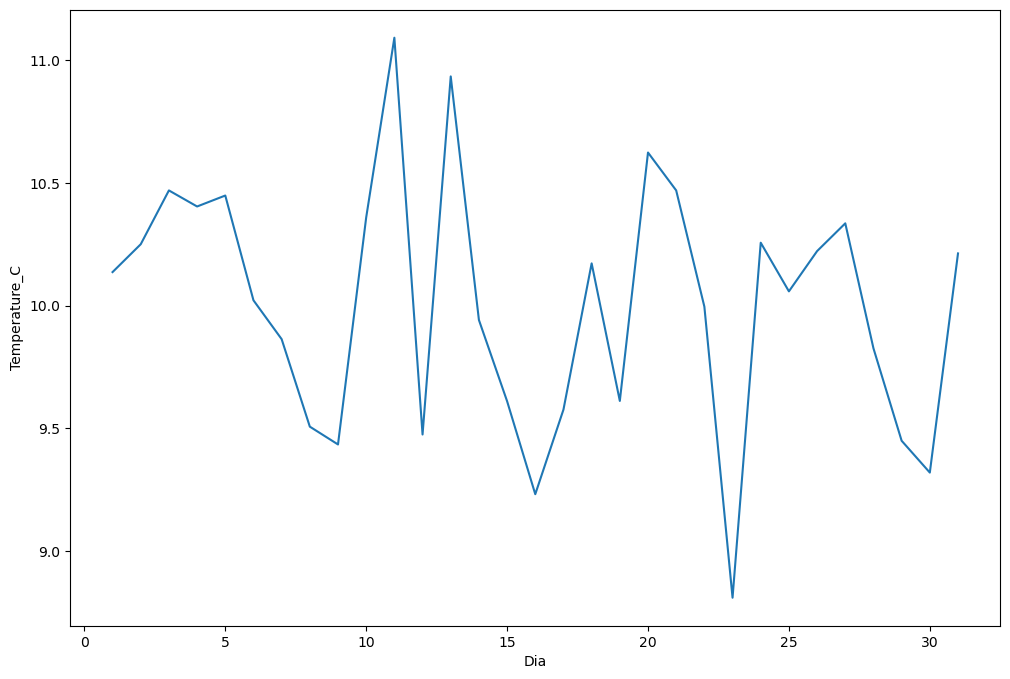

In [18]:
Datos1 = Datos_Ampliado.groupby(['Location','Mes', 'Dia'])['Temperature_C'].mean().reset_index()
Datos1 = Datos1.loc[((Datos1.Location == 'Phoenix') & (Datos1.Mes == 1)),:].reset_index(drop = True)
Datos1
y1 = Datos1.Temperature_C
x1 = Datos1.Dia

fig, ax = plt.subplots(figsize= (12,8))
sns.lineplot(data=Datos1, x=x1, y=y1 )

plt.show()

* Histograma para representar la **categorización de la temperatura para el mes de enero en la ciudad de Phoenix**

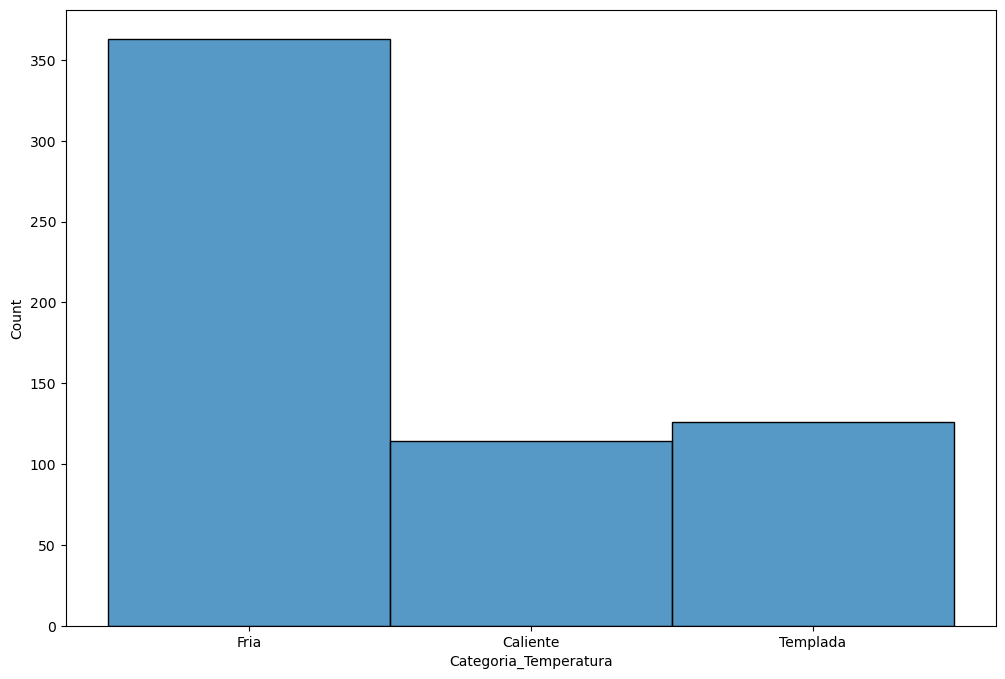

In [19]:
Datos1 = Datos_Ampliado.loc[((Datos_Ampliado.Location == 'Phoenix') & (Datos_Ampliado.Mes == 1) & (Datos_Ampliado.Dia == 1)),:].reset_index(drop = True)
Datos1
y1 = Datos1.Categoria_Temperatura

fig, ax = plt.subplots(figsize= (12,8))
sns.histplot(data=Datos1, x=y1 )

plt.show()

* Usar bucles para **generar y guardar múltiples gráficos**

In [42]:
def graficar(DataFrame, DatoInteres, Temporalidad, Tipo_Graf):
    numero = 1
    for i in Tipo_Graf.keys():
        fig, ax=plt.subplots(figsize=(12,8))

        if i in ["Lineplot","Barplot","Boxplot"]:
            eval(Tipo_Graf[i])(data=DataFrame, x=DatoInteres, y=Temporalidad)
        elif i in ["Histplot"]:
            eval(Tipo_Graf[i])(data=DataFrame, x=DatoInteres)

        ax.set_title(i+" de "+Temporalidad)
        ax.set_xlabel(DatoInteres)
        fig.savefig(i+" de "+Temporalidad,dpi=300)
        numero = numero+1
    return


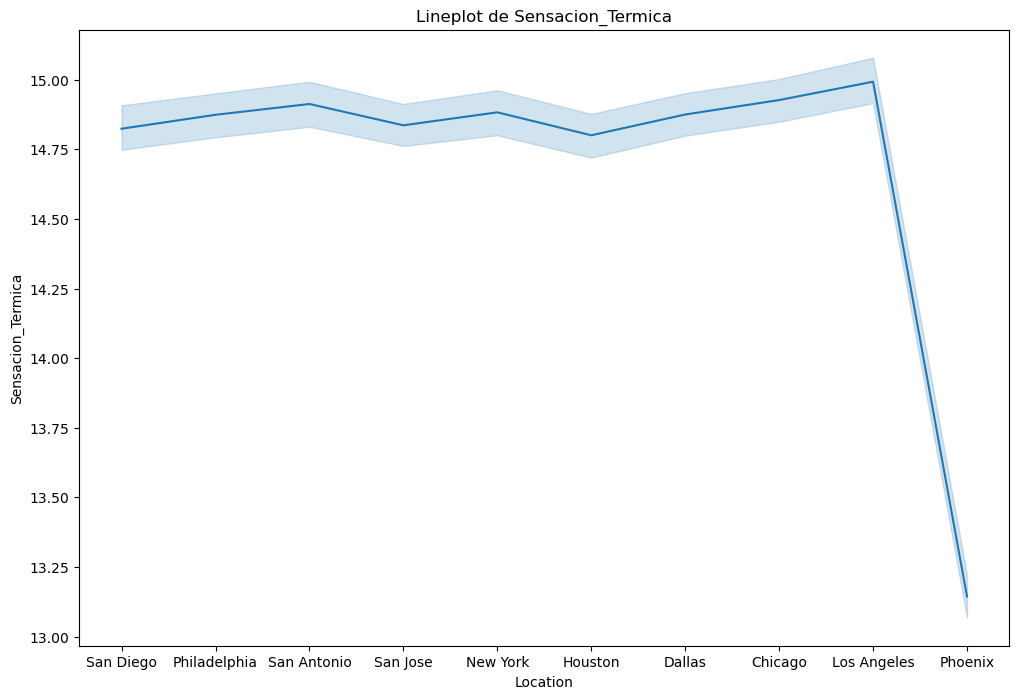

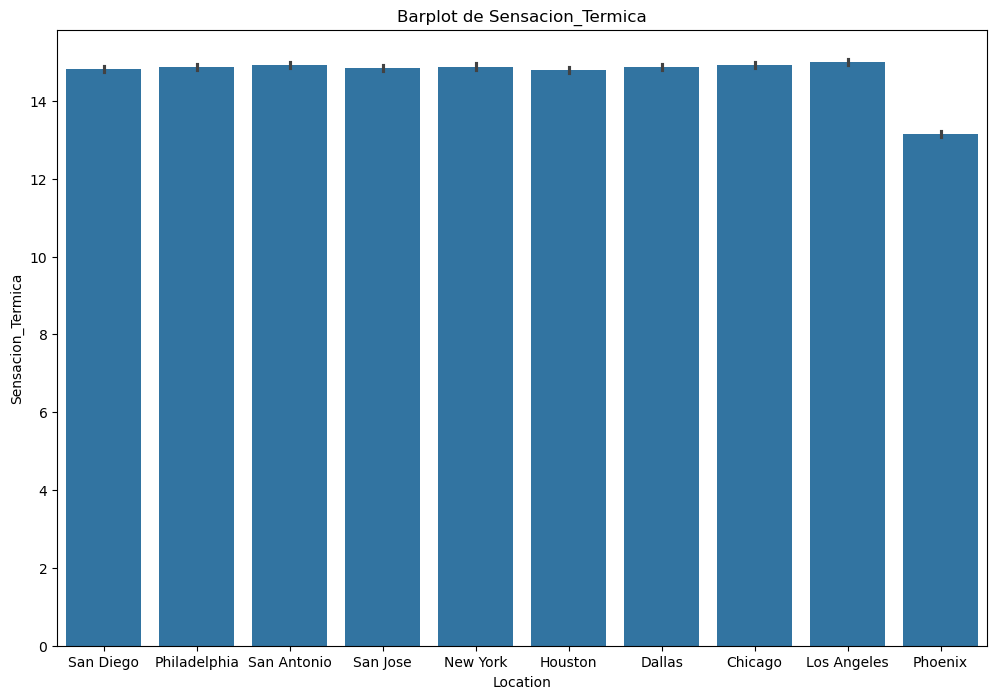

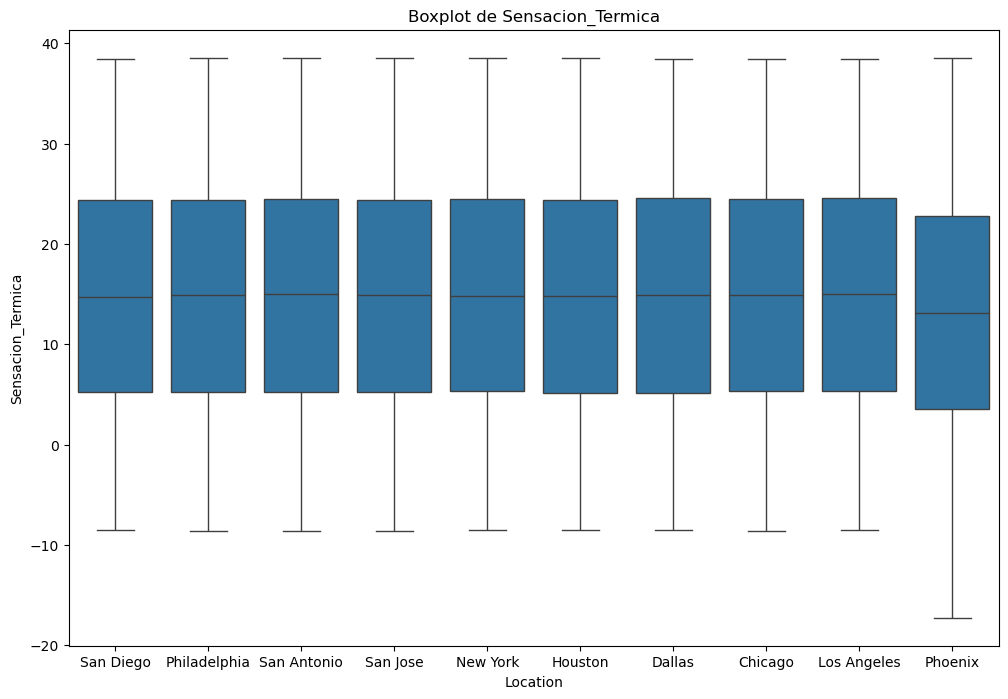

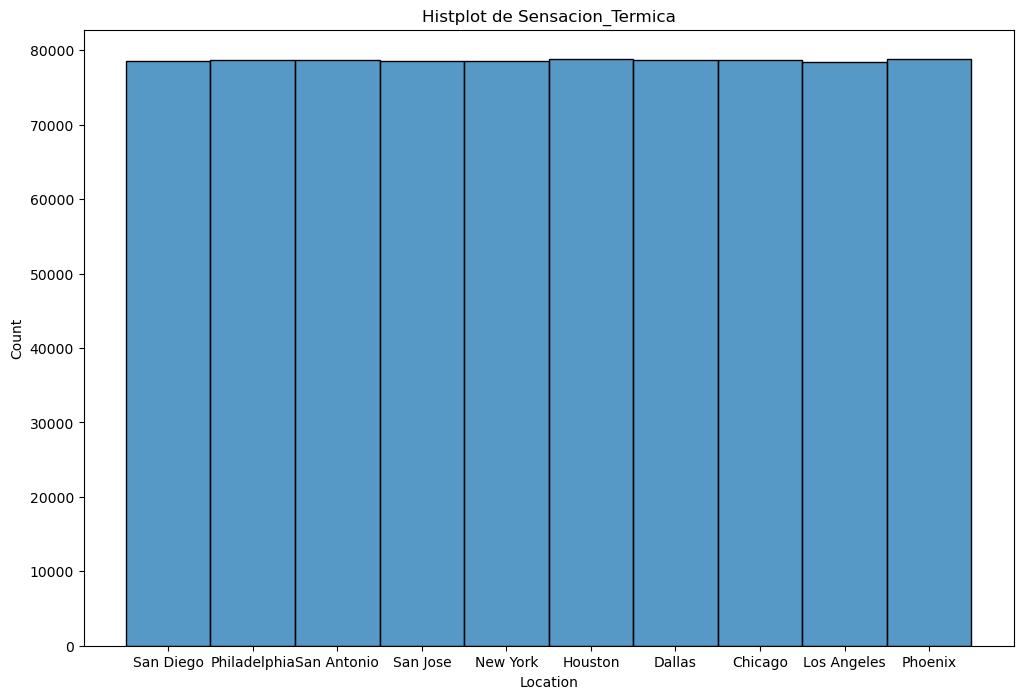

In [44]:
Tipo_Graf = {"Lineplot": "sns.lineplot","Barplot": "sns.barplot","Boxplot": "sns.boxplot","Histplot": "sns.histplot"}
graficar(Datos_Ampliado, "Location", "Sensacion_Termica", Tipo_Graf)

## **5. Conclusiones**

- Se implementaron funciones para realizar la limpieza y modificacion de los datos, para poder generar resumenes estadisticos con datos veraces. Este paso permitio obtener una tabla que inicialmente contaba con 10000 filas x 6 columnas, y con la limpieza de datos, se redujeron a 786469 filas × 6 columnas
- Se utilizaron estructuras de datos para crear funciones que permitan realizar procesos y analisis específicos. Este paso permitio identificar:

La Temperatura maxima corresponde a New York con un valor de: 40.00 oC.

 La Humedad maxima corresponde a San Jose con un valor de: 90.00%

 La Precipitacion maxima corresponde a Phoenix con un valor de: 14.93 mm.

 La velocidad de viento maxima corresponde a Philadelphia con un valor de: 30.00 km/h.
- Mediante la creacion de funciones se realizo el agrupamiento y agregacion de nuevas columnas de interes, asi como la exportacion de los datos por medio de metodos de librerias de python. Este paso permitió calcular la sensación térmica en función de la temperatura y la humedad, así como categorizar la temperatura por rangos.
- Se realizo la automatizacion de generacion de graficos a partir de bucles que permiten su visualizacion y creacion de archivo .png. Mediante las graficas fue posible interpretar que Phoenix es la ciudad que registra los valores promedios de sensación térmica mas bajos.

## **6. Recomendaciones**

- Se sugiere realizar una exploracion de los metodos disponibles de las librerias utilizadas para aplicarlas y optimizar la eficiencia del codigo.
- Emplear procesos adicionales para validar de manera integral los datos.
- Realizar una expansion del analisis exploratorio de los datos mediante tecnicas avanzadas para la deteccion de posibles anomalias.

## **7. Bibliografía**

- Pandas Development Team. (2024). Pandas documentation. Pandas. Retrieved April, 2024, from https://pandas.pydata.org/docs/

- Matplotlib Development Team. (2024). Matplotlib documentation. Matplotlib. Retrieved June 27, 2024, from https://matplotlib.org/stable/index.html

- Waskom, M. (2024). Seaborn documentation. Seaborn. Retrieved June 27, 2024, from https://seaborn.pydata.org/

- McKinney, W. (2017). Python para el análisis de datos (3a ed.). O'Reilly Media.

- McKinney, W. (2013). Análisis de datos con Pandas (1a ed.). Packt Publishing.

- Grus, J. (2015). Visualización de datos con Matplotlib y Seaborn (1a ed.). O'Reilly Media.

- Ruzena, Kralikova., Ervin, Lumnitzer. (2023). Thermal sensation models for environmental parameters testing. Acta Tecnología,  doi: 10.22306/atec.v9i1.163

- Mysoon, Siddig, Ali., Abdalla, Osman, Akode., Sally, D., Awadalkareem., Fares, Mohmed, Ahmed. (2016). A design of a remote weather factors monitoring system.   doi: 10.1109/ICCCCEE.2017.7867681